# Linear regression by least squares
## 1. EDA of literacy/fertility data:
In the next few exercises, we will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the illiteracy rate.

It is always a good idea to do some EDA ahead of our analysis. To this end, plot the fertility versus `illiteracy` and compute the Pearson correlation coefficient. The Numpy array `illiteracy` has the illiteracy rate among females for most of the world's nations. The array fertility has the corresponding fertility data.

Here, it may be useful to refer back to the function you wrote in the previous course to compute the Pearson correlation coefficient.

### Instructions:
* Plot `fertility` (y-axis) versus `illiteracy` (x-axis) as a scatter plot.
* Set a 2% margin.
* Compute and print the Pearson correlation coefficient between `illiteracy` and `fertility`.

In [1]:
# Import modules:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
# Set default Seaborn style
sns.set()

In [6]:
# Load file and create nd arrays
df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_1550/datasets/female_literacy_fertility.csv')
illiteracy = 100 - df['female literacy'].values
fertility = df['fertility'].values

def ecdf(data):
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

def pearson_r(x, y):
    return np.corrcoef(x, y)[0,1]

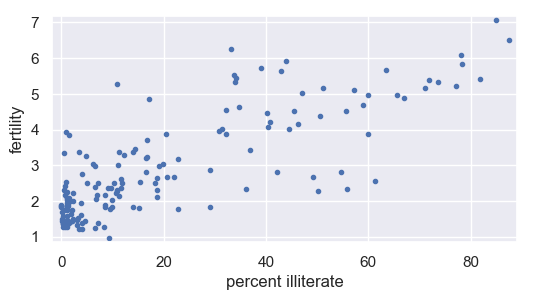

0.8041324026815346


In [7]:
plt.figure(figsize=(6,3), dpi=100)

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))

You can see the correlation between illiteracy and fertility by eye, and by the substantial Pearson correlation coefficient of 0.8. It is difficult to resolve in the scatter plot, but there are many points around near-zero illiteracy and about 1.8 children/woman.

## 2. Linear regression:
We will assume that fertility is a linear function of the female illiteracy rate. That is, $f=ai+b$, where $a$ is the slope and $b$ is the intercept. We can think of the intercept as the minimal fertility rate, probably somewhere between one and two. The slope tells us how the fertility rate varies with illiteracy. We can find the best fit line using `np.polyfit()`.

Plot the data and the best fit line. Print out the slope and intercept. (Think: what are their units?)

Instructions:
* Compute the slope and intercept of the regression line using `np.polyfit()`. Remember, `fertility` is on the y-axis and `illiteracy` on the x-axis.
* Print out the slope and intercept from the linear regression.
* To plot the best fit line, create an array `x` that consists of 0 and 100 using `np.array()`. Then, compute the theoretical values of `y` based on your regression parameters. I.e., `y = a * x + b`.
* Plot the data and the regression line on the same plot. Be sure to label your axes.
* Hit 'Submit Answer' to display your plot.

slope = 0.049798548090634276 children per woman / percent illiterate
intercept = 1.8880506106365555 children per woman


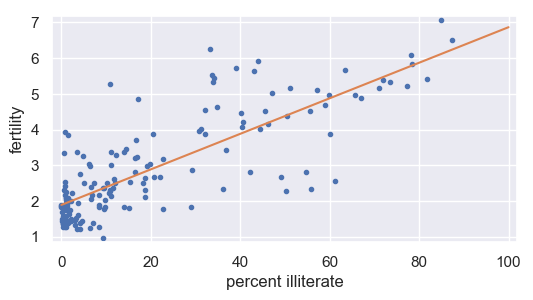

In [9]:
plt.figure(figsize=(6,3), dpi=100)

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

## 3. How is it optimal?
The function `np.polyfit()` that you used to get your regression parameters finds the _optimal_ slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). In this exercise, you will plot the function that is being optimized, the RSS, versus the slope parameter `a`. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal?

Instructions:
* Specify the values of the slope to compute the RSS. Use `np.linspace()` to get `200` points in the range between `0` and `0.1`. For example, to get `100` points in the range between `0` and `0.5`, you could use `np.linspace()` like so: `np.linspace(0, 0.5, 100)`.
* Initialize an array, `rss`, to contain the RSS using `np.empty_like()` and the array you created above. The `empty_like()` function returns a new array with the same shape and type as a given array (in this case, `a_vals`).
* Write a `for` loop to compute the sum of RSS of the slope. _Hint_: the RSS is given by `np.sum((y_data - a * x_data - b)**2)`. The variable `b` you computed in the last exercise is already in your namespace. Here, `fertility` is the `y_data` and `illiteracy` the `x_data`.
* Plot the RSS (`rss`) versus slope (`a_vals`).

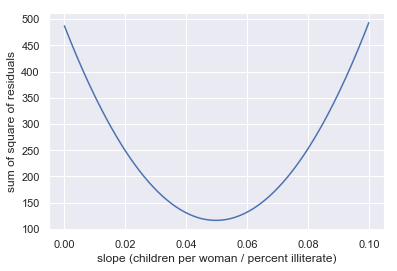

In [10]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

Notice that the minimum on the plot, that is the value of the slope that gives the minimum sum of the square of the residuals, is the same value you got when performing the regression.